# Linear Regression **Numpy only Vs. Sklearn**

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

## Dataset

In [206]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [207]:
diabetes = load_diabetes()

In [208]:
# create DataFrame
X_df = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)

y_df = pd.Series(diabetes.target, name="disease_progression")

# combine
df = pd.concat([X_df, y_df], axis=1)

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


> Although sex is conceptually categorical, it is encoded as a continuous standardized variable in the diabetes dataset to support linear modeling without additional feature engineering.

In [209]:
X, y = diabetes.data, diabetes.target

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Metrics

In [211]:
def mse_numpy(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_numpy(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

## Numpy only

In [212]:
import numpy as np

In [213]:
class LinearRegressionNp:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        """
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        """

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        XtX = X_b.T @ X_b

        XtX_inv = np.linalg.pinv(XtX)

        self.weights = XtX_inv @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights

In [214]:
lr_np = LinearRegressionNp() # closed-form
lr_np.fit(X_train, y_train)

y_pred_np = lr_np.predict(X_test)

In [215]:
np_loss = mse_numpy(y_test, y_pred_np)
np_r2 = r2_score_numpy(y_test, y_pred_np)

print(f"NumPy MSE:", np_loss)
print(f"NumPy R2:", np_r2)

NumPy MSE: 2821.7509810013007
NumPy R2: 0.4772897164322636


## Sklearn

In [216]:
from sklearn.linear_model import LinearRegression

In [217]:
lr_sk = LinearRegression() # closed-form
lr_sk.fit(X_train, y_train)

y_pred_sk = lr_sk.predict(X_test)

In [218]:
sk_loss = mse_numpy(y_test, y_pred_sk)
sk_r2 = r2_score_numpy(y_test, y_pred_sk)

print(f"Sklearn MSE:", sk_loss)
print(f"Sklearn R2:", sk_r2)

Sklearn MSE: 2821.750981001311
Sklearn R2: 0.4772897164322617


## Visualization & Analysis

In [219]:
print(np_loss < sk_loss, ':', np.abs(np_loss - sk_loss))
print(np_r2 > sk_r2, ':', np.abs(np_r2 - sk_r2))

True : 1.0459189070388675e-11
True : 1.887379141862766e-15


In [220]:
def plot_numpy_vs_sklearn_predictions(
    y_true,
    y_pred_np,
    y_pred_sk,
    title,
    filename
):
    plt.figure(figsize=(5,5))

    plt.scatter(
        y_true, y_pred_np,
        alpha=0.6,
        label="NumPy",
        marker="o"
    )

    plt.scatter(
        y_true, y_pred_sk,
        alpha=0.6,
        label="Sklearn",
        marker="x"
    )

    min_val = min(y_true.min(), y_pred_np.min(), y_pred_sk.min())
    max_val = max(y_true.max(), y_pred_np.max(), y_pred_sk.max())

    plt.plot([min_val, max_val], [min_val, max_val], '--k')

    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_predictions(y_true, y_pred, title, filename):
    plt.figure(figsize=(5,5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             '--r')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_residuals(y_true, y_pred, title, filename):
    residuals = y_true - y_pred

    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_residual_difference(
    y_true,
    y_pred_np,
    y_pred_sk,
    title,
    filename
):
    residual_np = y_true - y_pred_np
    residual_sk = y_true - y_pred_sk
    diff = residual_np - residual_sk

    plt.figure(figsize=(6,4))
    plt.scatter(y_true, diff, alpha=0.6)
    plt.axhline(0, color="r", linestyle="--")

    plt.xlabel("True Values")
    plt.ylabel("Residual(NP) - Residual(SK)")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

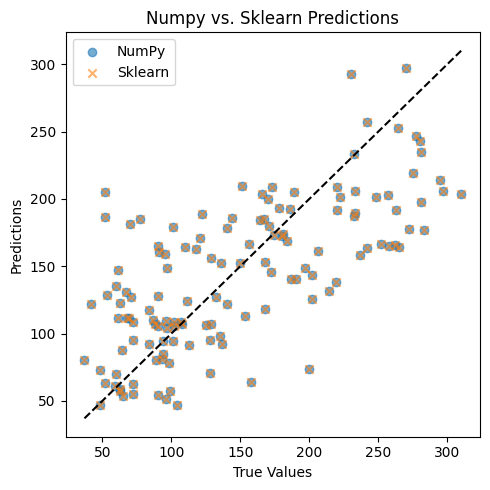

In [221]:
plot_numpy_vs_sklearn_predictions(
    y_test,
    y_pred_np,
    y_pred_sk,
    'Numpy vs. Sklearn Predictions',
    'numpy_vs_sklearn_predictions.png'
)

> Nearly overlapping predictions indicate that both NumPy and scikit-learn implementations converge to the same solution.

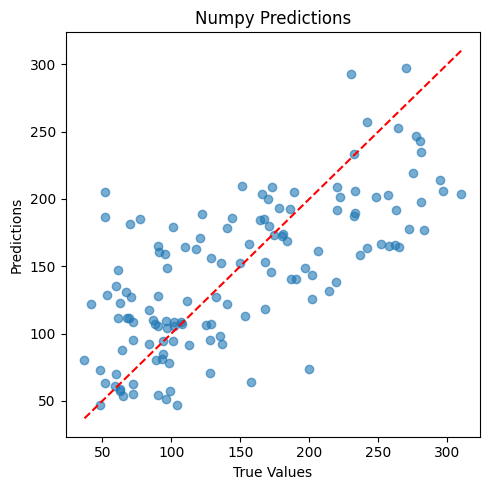

In [222]:
plot_predictions(y_test, y_pred_np, 'Numpy Predictions', 'numpy_predictions.png')

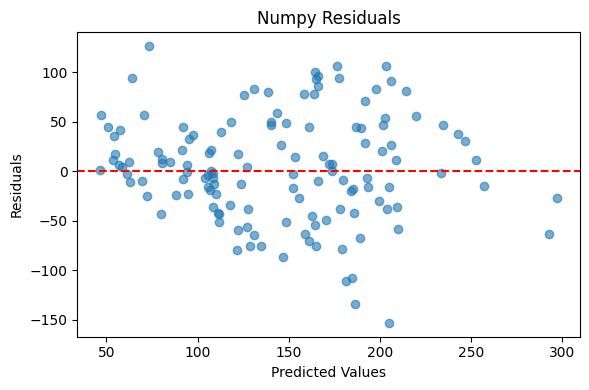

In [223]:
plot_residuals(y_test, y_pred_np, 'Numpy Residuals', 'numpy_residuals.png')

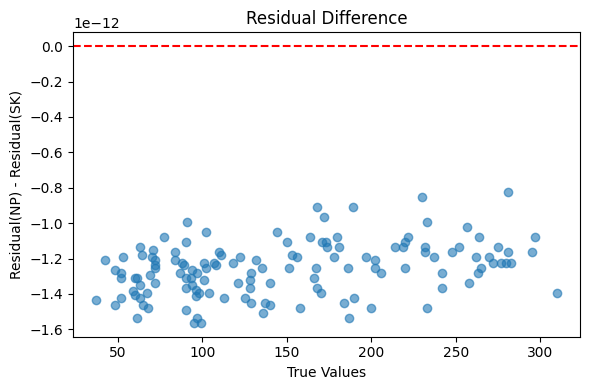

In [224]:
plot_residual_difference(
    y_test,
    y_pred_np,
    y_pred_sk,
    'Residual Difference',
    'residual_difference.png'
)

> The relatively modest R² score is expected, as the diabetes dataset exhibits non-linear relationships and significant noise. Since Linear Regression assumes linearity, its capacity to fully explain the variance is inherently limited. This makes the dataset suitable for benchmarking optimization methods rather than achieving maximal predictive performance.

> On a synthetic linear dataset, the closed-form solution achieves near-perfect R², validating the correctness of the implementation.